<div style="border:solid green 2px; padding: 20px">
    
<b>Hello, Lauren!</b> We're glad to see you in code-reviewer territory. You've done a great job on the project, but let's get to know each other and make it even better! We have our own atmosphere here and a few rules:


1. I work as a code reviewer, and my main goal is not to point out your mistakes, but to share my experience and help you become a data analyst.
2. We speak on a first-come-first-served basis.
3. if you want to write or ask a question, don't be shy. Just choose your color for your comment.  
4. this is a training project, you don't have to be afraid of making a mistake.  
5. You have an unlimited number of attempts to pass the project.  
6. Let's Go!


---
I'll be color-coding comments, please don't delete them:

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__


Remarks. Some recommendations.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Success. Everything is done succesfully.
</div>
    
---
    
I suggest that we work on the project in dialogue: if you change something in the project or respond to my comments, write about it. It will be easier for me to track changes if you highlight your comments:   
    
<div class="alert alert-info"> <b>Student сomments:</b> Student answer..</div>
    
All this will help to make the recheck of your project faster. If you have any questions about my comments, let me know, we'll figure it out together :)   
    
---

# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

[We've provided you with some commentary to guide your thinking as you complete this project. However, make sure to remove all the bracketed comments before submitting your project.]

[Before you dive into analyzing your data, explain for yourself the purpose of the project and actions you plan to take.]

[Please bear in mind that studying, amending, and analyzing data is an iterative process. It is normal to return to previous steps and correct/expand them to allow for further steps.]

## Initialization

Introduction: The purpose of this project is to analyze the Surf and Ultimate prepaid plans for the company Megaline. The commerical deparment wants to determine which plan brings in more revenue, so they can properly modify their advertising budget. The data should provide insights into client's behavior in 2018. It will provide insight on the clients, what plan they use, the number of calls and text messages they sent in 2018. In examining this data I will take the following steps: 
1. Opening the data files and examining the preliminarly information from each file.  
2.Preparing the data by converting it to appropriate data types where necessary, finding and eliminating errors in the data. 
3. Examining and analyzing the data that will best describe client's behavior including: 
a. Determining the minutes, texts, volume of data for users of each plan per month. 
b. Calculating the mean, variance, and standard deviation for each plan. 
c. Devising visualizations of the data that will describe the distributions of the data. 
4. Then I will test the following hypotheses to support the companies decision making process :
a. Does the average revenue from users of Ultimate and Surf calling plans differ signficantly? 
b. Does the average revenue from users in the NY-NJ area differ signficantly from that of the users from other regions?  
5. Provide an exaplanation on the following:  
    i. Determination of the appropriate alpha value to use. 
    ii.Explanations will be provided for how the null and alternative hypotheses were determined. 
    iii. The criterion used to test the hypotheses and why this was the criteria applied. 
6. Provide a conclusion on what plan brings in more revenue. 

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

An excellent practice is to describe the goal and main steps in your own words (a skill that will help a lot on a final project). It would be good to add the progress and purpose of the study.

In [1]:
# Loading all the libraries
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 

from scipy import stats 



## Load data

In [2]:
# Load the data files into different DataFrames

#calls datafile 
calls = pd.read_csv('/datasets/megaline_calls.csv')

#internet datafile 
internet = pd.read_csv('/datasets/megaline_internet.csv')

#messages datafile 
messages = pd.read_csv('/datasets/megaline_messages.csv')

#plans datafile 
plans = pd.read_csv('/datasets/megaline_plans.csv')

#users datafile 
users = pd.read_csv('/datasets/megaline_users.csv')

Description: Each dataset has been loaded. Each dataset will need to be examined individually to find obvious issues. The issues will be taken care of during the data cleaning phase. 



## Prepare the data

In [3]:
#Calls data file 
calls.info() #general information on data
display(calls)#closer look at data 
calls.describe()#statistical information on data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


Data Validation Summary: 
1. The data types appear to be correct based on the Dtype column.
2. All column titles are in lowercase and formatted with appropriate spacing.
3. There are no missing values, as all counts align with the total number of entries.

Observations: 
1. The minimum value in the duration column is 0, indicating a probable missed call.

Next Steps:
1. Convert the call_date to datetime format.
2. Round the duration values up to the nearest whole number and change the data type from float64 to int64.


In [4]:
#Internet data files 
internet.info() #general information on data
display(internet)#closer look at data 
internet.describe()#statistical information on data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


Data Validation Summary: 
1. Dtype column indicates correct data types being utilized. However, 2 columns formatting will need to be changed for greater accuracy.  
2. All column titles are appropriated formatted in lowercase with proper spacing 
3. No missing values as all counts correspond to the number of entries. 

Observations: 
1. Minimum amount of mb used is 0 which may indicate some users are not using all of the services provided. 

Next Steps: 
1. Convert session_date to datetime format. 
2. Change megabytes to gigabytes. 


In [5]:
#Messages data files 
messages.info() #general information on data
display(messages)#closer look at data 
messages.describe()#statistical information on data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


Data Validation Summary:  
1. Based on Dtype column looks like correct data types being used.
2. All column titles are lowercase & spaced appropriately. 
3. There are no missing values as all counts match the number of entries.

Next steps:  
1. Convert message_date to datetime format. 

In [6]:
#Plans data files 
plans.info() #general information on data
display(plans) #closer look at data 
plans.describe()#statistical information on data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


Data Validation Summary:  
1. Data types in the Dtype column appear correct. However, the mb_per_month_included needs to be changed to gigabytes. 
2. All column titles are formatted in lowercase with appropriate spacing. 
3. No missing values as indicated by the total number of entries. 


Next steps: 
1. mb_per_month_included needs to be converted to gigabytes at an appropriate juncture. 

In [7]:
#Users data files 
users.info() #general information on data
display(users) #closer look at data 
users.describe()#statistical information on data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


Data Validation Summary: 
1.Data types appear correct based on the Dtype column. Still, need to convert reg_date and churn_date columns to datetime format.  
2. All column titles are appropriately formatted in lowercase with proper spacing. 
3. Presence of NaN values in the churn_date column indicates active users. Therefore, the 466 missing values do not require modification or concern. 

Next steps:
1. Convert reg_date and churn_date columns to datetime format. 

[The data for this project is split into several tables. Explore each one to get an initial understanding of the data. Do necessary corrections to each table if necessary.]

## Plans

In [8]:
# Print the general/summary information about the plans' DataFrame
plans.info() #general information on data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [9]:
#Checking for duplicates
plans.duplicated().sum()

0

In [10]:
# Print a sample of data for plans
plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Description: Data types look appropriate for each column. The data makes sense based on the description. There are no missing values as all counts match the number of entries. However, the conversion of megabytes data in the mb_per_month to gigabytes needs to be done. In addition, this column will need to be renamed.  

[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

## Fix data

[Fix obvious issues with the data given the initial observations.]

In [11]:
# Change mb_per_month_included by dividing by 1024, then round up and change to int64 datatype 
plans['mb_per_month_included'] = np.ceil (plans['mb_per_month_included']/1024).astype('int64')

#Rename column name as gb_per_month_included 
plans.rename(columns= {'mb_per_month_included':'gb_per_month_included'}, inplace=True)


<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

That's right. There are 1,024 megabytes in one gigabyte.

In [12]:
#Check the plans datafile again 
plans.info()
display(plans)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   gb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15,500,20,10,0.03,0.03,surf
1,1000,30,3000,70,7,0.01,0.01,ultimate


Description: Updated megabytes to gigabytes and altered column name to reflect the correct units. 

## Enrich data

[Add additional factors to the data if you believe they might be useful.]

Description: No further edits to the plan datafile. 

## Users

In [13]:
# Print the general/summary information about the users' DataFrame
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [14]:
#Checking for duplicates
users.duplicated().sum()

0

In [15]:
# Print a sample of data for users
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


Description: It would be helpful to turn reg-date to date time data using to_datetime() method of pandas.In addition it may be helpful for future analysis work to create a regions column that sorts for NY-NJ. 

[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix Data

[Fix obvious issues with the data given the initial observations.]

In [16]:
#Change the data types of churn_date and reg_date to datetime 
users ['reg_date'] = pd.to_datetime(users['reg_date'], format ='%Y.%m.%d')
users['churn_date']=pd.to_datetime(users['churn_date'],format ='%Y.%m.%d')

#Check the users data file again 
users.info()
display(users)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaT
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaT
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT


### Enrich Data

[Add additional factors to the data if you believe they might be useful.]

In [17]:
#Create region column for NY-NJ area 
users['region']= users['city'].apply(lambda x:'NY-NJ' if 'New York-Newark-Jersey City' in x else 'others' )

#Check the users data file 
users[['city', 'region']]

,city,region
0,"Atlanta-Sandy Springs-Roswell, GA MSA",others
1,"Seattle-Tacoma-Bellevue, WA MSA",others
2,"Las Vegas-Henderson-Paradise, NV MSA",others
3,"Tulsa, OK MSA",others
4,"Seattle-Tacoma-Bellevue, WA MSA",others
...,...,...
495,"New York-Newark-Jersey City, NY-NJ-PA MSA",NY-NJ
496,"New Orleans-Metairie, LA MSA",others
497,"Los Angeles-Long Beach-Anaheim, CA MSA",others
498,"New York-Newark-Jersey City, NY-NJ-PA MSA",NY-NJ


In [18]:
#Extracting the month and year would be helpful when aggregating data 
def create_datetime_values(data,name_date): 
    name = name_date.split('_')[0]
    
    # Devise new columns to help with extration of year and month 
    data[f'{name}_year'] = data[f'{name}_date'].dt.year 
    data[f'{name}_month'] = data[f'{name}_date'].dt.month 

# Create datatime values for reg-date 
create_datetime_values(users,'reg_date')

#Check again on the users datafile 
display(users)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,region,reg_year,reg_month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,others,2018,12
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,others,2018,8
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,others,2018,10
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,others,2018,1
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,others,2018,5
...,...,...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaT,NY-NJ,2018,9
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT,others,2018,2
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaT,others,2018,12
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT,NY-NJ,2018,2


In [19]:
#Add datetime values for churn_date 
create_datetime_values(users,'churn_date')

#Check users datafile 
users.query('churn_date.notna()')[
    ['churn_date','churn_year','churn_month']
].head()

,churn_date,churn_year,churn_month
6,2018-12-18,2018.0,12.0
12,2018-11-16,2018.0,11.0
22,2018-09-07,2018.0,9.0
40,2018-12-30,2018.0,12.0
50,2018-10-07,2018.0,10.0


Description: Later on I will require the revenue from users in the NY-NJ area so it will be helpful to have a regions column to extract this information. Additionally, I will need to test the monthly revenue values in 2018, therefore, creating two additional columns containing the year and month will support later analysis.Finally, I created a datetime values for the churn_date to further support the anaylysis process. 

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

No checking for duplicates of each dataset. Please add

Added in duplicate check for each datafile using duplicated().sum() method. 

## Calls

In [20]:
# Print the general/summary information about the calls' DataFrame
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [21]:
#Checking for duplicates
calls.duplicated().sum()

0

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__

Duplicate checking is the basis of data preprocessing

In [22]:
# Print a sample of data for calls
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


Description: I will need to change the vales for call_date to datetime. Based on the data description the call duration needs to be rounded up to the higher number. I will need to use the np.ceil() method to round up. 

[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [23]:
#Change data types of call_date to datetime 
calls['call_date'] = pd.to_datetime(calls['call_date'],format ='%Y.%m.%d')

#Check the calls data file 
display(calls)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


In [24]:
#Update datetime values for calls 
create_datetime_values(calls,'call_date')

#Check calls data file 
display(calls)


,id,user_id,call_date,duration,call_year,call_month
0,1000_93,1000,2018-12-27,8.52,2018,12
1,1000_145,1000,2018-12-27,13.66,2018,12
2,1000_247,1000,2018-12-27,14.48,2018,12
3,1000_309,1000,2018-12-28,5.76,2018,12
4,1000_380,1000,2018-12-30,4.22,2018,12
...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,2018,11
137731,1499_200,1499,2018-10-20,10.89,2018,10
137732,1499_201,1499,2018-09-21,8.12,2018,9
137733,1499_202,1499,2018-10-10,0.37,2018,10


Description: Updated the call_date to be in datetime format. 

### Enrich data

In [25]:
#Check the records for 0 duration calls 
display('Percentage of 0 seconds calls in call_data:' +
       f'{calls.query("duration == 0").shape[0]/calls.shape[0]:.2%}')

'Percentage of 0 seconds calls in call_data:19.48%'

In [26]:
#Remove the 0 duration calls 
calls= calls.query('duration ! = 0')

#Check the calls data file
calls.info()
display(calls)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 110901 entries, 0 to 137734
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id          110901 non-null  object        
 1   user_id     110901 non-null  int64         
 2   call_date   110901 non-null  datetime64[ns]
 3   duration    110901 non-null  float64       
 4   call_year   110901 non-null  int64         
 5   call_month  110901 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 5.9+ MB


,id,user_id,call_date,duration,call_year,call_month
0,1000_93,1000,2018-12-27,8.52,2018,12
1,1000_145,1000,2018-12-27,13.66,2018,12
2,1000_247,1000,2018-12-27,14.48,2018,12
3,1000_309,1000,2018-12-28,5.76,2018,12
4,1000_380,1000,2018-12-30,4.22,2018,12
...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,2018,11
137731,1499_200,1499,2018-10-20,10.89,2018,10
137732,1499_201,1499,2018-09-21,8.12,2018,9
137733,1499_202,1499,2018-10-10,0.37,2018,10


In [27]:
#Round up each duration and change the data type to int64 
calls['duration']=np.ceil(calls['duration']).astype('int64')

#Check calls data file 
calls.head()

,id,user_id,call_date,duration,call_year,call_month
0,1000_93,1000,2018-12-27,9,2018,12
1,1000_145,1000,2018-12-27,14,2018,12
2,1000_247,1000,2018-12-27,15,2018,12
3,1000_309,1000,2018-12-28,6,2018,12
4,1000_380,1000,2018-12-30,5,2018,12


<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Good for you for using the np.ceil() method
    

Description: Cleaned up the data to remove the 0 duration calls as those will interfere with later analysis. In addition, rounded up the duration as described by the plan. 

[Add additional factors to the data if you believe they might be useful.]

## Messages

In [28]:
# Print the general/summary information about the messages' DataFrame
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [29]:
#Checking for duplicates
messages.duplicated().sum()

0

In [30]:
# Print a sample of data for messages
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


Description: I will need to change the data types of message_date to datatime format. No obvious signs of duplicates based on the number of entries. 

[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [31]:
#Change the data types of message_date to datetime 
messages['message_date']= pd.to_datetime(messages['message_date'], format ='%Y.%m.%d' )

#Check on change 
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [32]:
#Datetime values for message_date 
create_datetime_values(messages,'message_date')

#Check on change 
messages[
    ['message_date','message_year','message_month']
].head()

messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             76051 non-null  object        
 1   user_id        76051 non-null  int64         
 2   message_date   76051 non-null  datetime64[ns]
 3   message_year   76051 non-null  int64         
 4   message_month  76051 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 2.9+ MB


Description: Converted to datetime. 

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

Description: Nothing required. 

## Internet

In [33]:
# Print the general/summary information about the internet DataFrame
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [34]:
#Checking for duplicates
internet.duplicated().sum()

0

In [35]:
# Print a sample of data for the internet traffic
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


Description: It would be a prudent idea to convert to datetime for session_date and devise new columns for easier extraction of data. 

[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [36]:
#Make session_date to datetime 
internet['session_date'] = pd.to_datetime(internet['session_date'], format ='%Y.%m.%d')

#Check on internet data file 
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [37]:
#Create datetime values for session_date 
create_datetime_values(internet, 'session_date')

#Check on new columns 
internet[
    ['session_date', 'session_year','session_month']
].head()

,session_date,session_year,session_month
0,2018-12-29,2018,12
1,2018-12-31,2018,12
2,2018-12-28,2018,12
3,2018-12-26,2018,12
4,2018-12-27,2018,12


Description: Corrected to datetime for session date and devised new columns for easier extraction of data. 

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [38]:
#See percent of records have value of 0 in gb_used 
print('Percentage of 0 gb_used internet session in internet:' +
     f'{internet.query("mb_used == 0").shape[0] / internet.shape[0]:.2%}')
      

Percentage of 0 gb_used internet session in internet:13.11%


In [39]:
#Drop the 0 values in gb_used 
internet = internet.query('mb_used !=0')

#Check internet data file 
internet.info()
internet.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91078 entries, 0 to 104824
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             91078 non-null  object        
 1   user_id        91078 non-null  int64         
 2   session_date   91078 non-null  datetime64[ns]
 3   mb_used        91078 non-null  float64       
 4   session_year   91078 non-null  int64         
 5   session_month  91078 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 4.9+ MB


,id,user_id,session_date,mb_used,session_year,session_month
0,1000_13,1000,2018-12-29,89.86,2018,12
2,1000_379,1000,2018-12-28,660.40,2018,12
3,1000_413,1000,2018-12-26,270.99,2018,12
4,1000_442,1000,2018-12-27,880.22,2018,12
5,1001_0,1001,2018-08-24,284.68,2018,8


Description: Dropped the 0's to ensure data will be more accurate when completing are statistical evaluation. 

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Correct
    

## Study plan conditions

[It is critical to understand how the plans work, how users are charged based on their plan subscription. So, we suggest printing out the plan information to view their conditions once again.]

In [40]:
# Print out the plan conditions and make sure they are clear for you
display(plans)

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15,500,20,10,0.03,0.03,surf
1,1000,30,3000,70,7,0.01,0.01,ultimate


Description: Reviewed plan data to ensure that all columns are in appropriate format for easier analysis and fits the description of the data provided. 

## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [41]:
# Calculate the number of calls made by each user per month. Save the result.
user_monthly_call = pd.pivot_table(
data = calls,
index = ['user_id', 'call_month'],
values =  'id',
aggfunc= 'count'
).reset_index()

#Revise columns 
user_monthly_call.columns = [
'user_id','month','total_call'
]
#Check on user_monthly_call 
user_monthly_call 



,user_id,month,total_call
0,1000,12,16
1,1001,8,22
2,1001,9,38
3,1001,10,47
4,1001,11,49
...,...,...,...
2251,1498,12,32
2252,1499,9,35
2253,1499,10,41
2254,1499,11,39


In [42]:
# Calculate the amount of minutes spent by each user per month. Save the result.
user_monthly_call_duration = pd.pivot_table(
data=calls,
index=['user_id','call_month'],
values='duration',
aggfunc=['count','sum']
).reset_index()

#Revise the columns 
user_monthly_call_duration.columns = [
    'user_id', 'month','total_call','total_duration_minute'
]
#Check user_monthly_call_duration 
user_monthly_call_duration

,user_id,month,total_call,total_duration_minute
0,1000,12,16,124
1,1001,8,22,182
2,1001,9,38,315
3,1001,10,47,393
4,1001,11,49,426
...,...,...,...,...
2251,1498,12,32,339
2252,1499,9,35,346
2253,1499,10,41,385
2254,1499,11,39,308


In [43]:
# Calculate the number of messages sent by each user per month. Save the result.
user_monthly_message = pd.pivot_table(
data = messages,
index=['user_id','message_month'],
values = 'id',
aggfunc = 'count'
).reset_index() 

#Revise columns  
user_monthly_message.columns = [
    'user_id', 'month','total_message'
]
#Check on user_monthly_message 
user_monthly_message

,user_id,month,total_message
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [44]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
user_monthly_internet = pd.pivot_table(
    data = internet,
    index = ['user_id','session_month'],
    values = 'mb_used',
    aggfunc = 'sum'
).reset_index()

#Revising columns 
user_monthly_internet.columns = [
    'user_id','month','total_internet_volume_mb'
]
#Check user_monthly_internet 
user_monthly_internet

,user_id,month,total_internet_volume_mb
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


In [45]:
#Update the total_internet_volume_mb by dividing by 1024 to get gigabytes and round up to interger & change data type to int64 
user_monthly_internet['total_internet_volume_mb'] = (
    np.ceil(user_monthly_internet['total_internet_volume_mb'] / 1024).astype('int64')
)

#Rename total_internet_volume_mb to total_internet_volume_gb
user_monthly_internet = user_monthly_internet.rename(
    columns = {'total_internet_volume_mb': 'total_internet_volume_gb'},
)
#Check on user_monthly_internet
user_monthly_internet.head()

,user_id,month,total_internet_volume_gb
0,1000,12,2
1,1001,8,7
2,1001,9,14
3,1001,10,22
4,1001,11,19


Description: The data has been aggregated and calculations using pivot tables have been made about the following: 
a. Monthly number of calls per user 
b. Monthly call duration per user 
c. Monthly number of messages per user 
d. Monthly volume of internet traffic used by user 
In addition, the unit of megabytes has been updated to gigabytes for internet traffic used to ensure continuity for future calculations.  

[Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.]

In [46]:
# Merge the data for calls, minutes, messages, internet based on user_id and month & plans 
user_monthly_data = users.merge(user_monthly_call_duration, 
                                on='user_id', 
                                how='left'
)

user_monthly_data = user_monthly_data.merge(user_monthly_message, 
                                             on=['user_id', 'month'], 
                                             how='left'
)

user_monthly_data = user_monthly_data.merge(user_monthly_internet,
                                            on=['user_id', 'month'],  
                                            how='left'
)

user_monthly_data.fillna({'total_duration_minute': 0, 'total_message': 0, 'total_internet_volume_gb': 0}, inplace=True)

user_monthly_data = user_monthly_data.merge(plans, left_on='plan', right_on='plan_name', how='left')

#Check user_monthly_data 
user_monthly_data.columns 

#Check again 
user_monthly_data

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,region,reg_year,...,total_message,total_internet_volume_gb,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,others,2018,...,11.0,2.0,1000,30,3000,70,7,0.01,0.01,ultimate
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,others,2018,...,30.0,7.0,50,15,500,20,10,0.03,0.03,surf
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,others,2018,...,44.0,14.0,50,15,500,20,10,0.03,0.03,surf
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,others,2018,...,53.0,22.0,50,15,500,20,10,0.03,0.03,surf
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,others,2018,...,36.0,19.0,50,15,500,20,10,0.03,0.03,surf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2270,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT,NY-NJ,2018,...,0.0,23.0,50,15,500,20,10,0.03,0.03,surf
2271,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,others,2018,...,0.0,13.0,50,15,500,20,10,0.03,0.03,surf
2272,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,others,2018,...,0.0,20.0,50,15,500,20,10,0.03,0.03,surf
2273,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT,others,2018,...,0.0,17.0,50,15,500,20,10,0.03,0.03,surf


Description: A single Dataframe was created via aggregating data to ensure that each record reflects the consumption of an unique user for a specified month. 

[Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan). N.B. This might not be as trivial as just a couple of lines given the plan conditions! So, it's okay to spend some time on it.]

In [47]:
# Calculate the monthly revenue for each user
def revenue_calc(row): 
    
    total_duration_minute = row['total_duration_minute']
    minutes_included = row['minutes_included']
    usd_per_minute = row['usd_per_minute']
    
    total_message = row['total_message']
    messages_included = row['messages_included']
    usd_per_message = row['usd_per_message'] 
    
    total_internet_volume_gb = row['total_internet_volume_gb']
    gb_per_month_included = row['gb_per_month_included']
    usd_per_gb = row['usd_per_gb']
    
    usd_monthly_pay = row['usd_monthly_pay']
    
#Check if greater than 0 for extra minutes, messages, internet 
    minutes_overage = max(total_duration_minute - minutes_included, 0) 
    message_overage = max(total_message - messages_included, 0)
    internet_overage = max(total_internet_volume_gb - gb_per_month_included, 0)

#Calculate revenue
    revenue_calculation = (minutes_overage * usd_per_minute) + (message_overage * usd_per_message) + (internet_overage * usd_per_gb) + usd_monthly_pay

    return revenue_calculation 

# Check on revenue_calculation
user_monthly_data['monthly_revenue_calculation'] = user_monthly_data.apply(revenue_calc, axis = 1)

user_monthly_data.columns





Index(['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan',
       'churn_date', 'region', 'reg_year', 'reg_month', 'churn_year',
       'churn_month', 'month', 'total_call', 'total_duration_minute',
       'total_message', 'total_internet_volume_gb', 'messages_included',
       'gb_per_month_included', 'minutes_included', 'usd_monthly_pay',
       'usd_per_gb', 'usd_per_message', 'usd_per_minute', 'plan_name',
       'monthly_revenue_calculation'],
      dtype='object')

Description: A row level function was applied to calculate the monthly revenue from each user. This will be paramount in are statistical analysis.

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__

Creat code

## Study user behaviour

[Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.]

[There are relevant hints in the comments for Calls but they are not provided for Messages and Internet though the principle of statistical study is the same for them as for Calls.]

### Calls

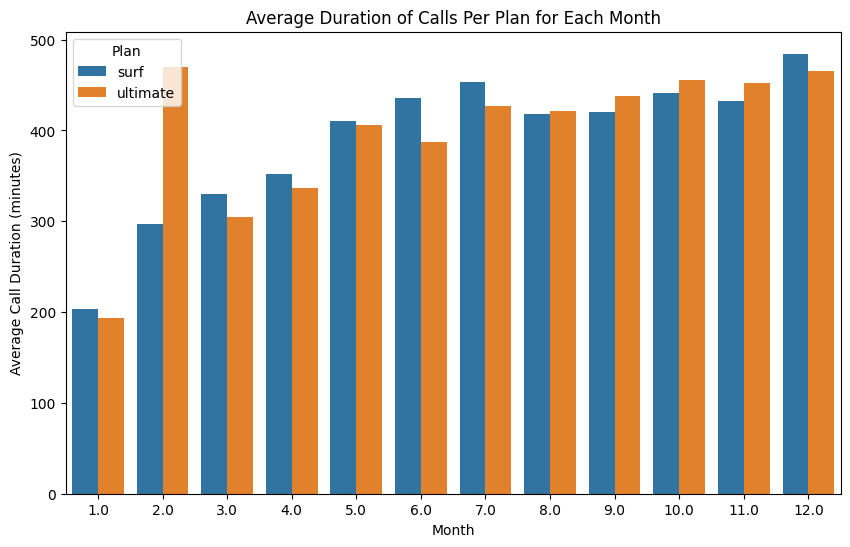

In [48]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plot to visualize it.
mean_duration = user_monthly_data.groupby(['plan','month'])['total_duration_minute'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=mean_duration, x='month', y='total_duration_minute' ,hue='plan')
plt.title('Average Duration of Calls Per Plan for Each Month')
plt.xlabel('Month')
plt.ylabel('Average Call Duration (minutes)')
plt.legend(title='Plan')
plt.show()


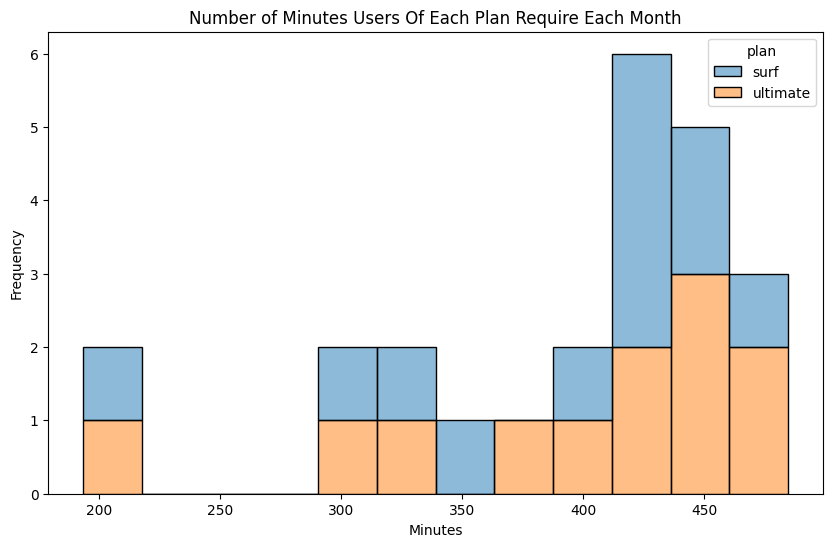

In [49]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.

plt.figure(figsize =(10,6))

#plot histogram 
sns.histplot(mean_duration, x='total_duration_minute', hue='plan', multiple = 'stack', bins=12, legend = True, alpha=0.5)

plt.title('Number of Minutes Users Of Each Plan Require Each Month')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.show()

[Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.]

In [50]:
# Calculate the mean and the variance of the monthly call duration
monthly_call_duration_stats = user_monthly_data.groupby('plan')['total_duration_minute'].agg(['mean','var']).reset_index()

#Check on monthly_call_duration_stats 
monthly_call_duration_stats

,plan,mean,var
0,surf,433.155427,53623.838295
1,ultimate,431.649025,57487.536338


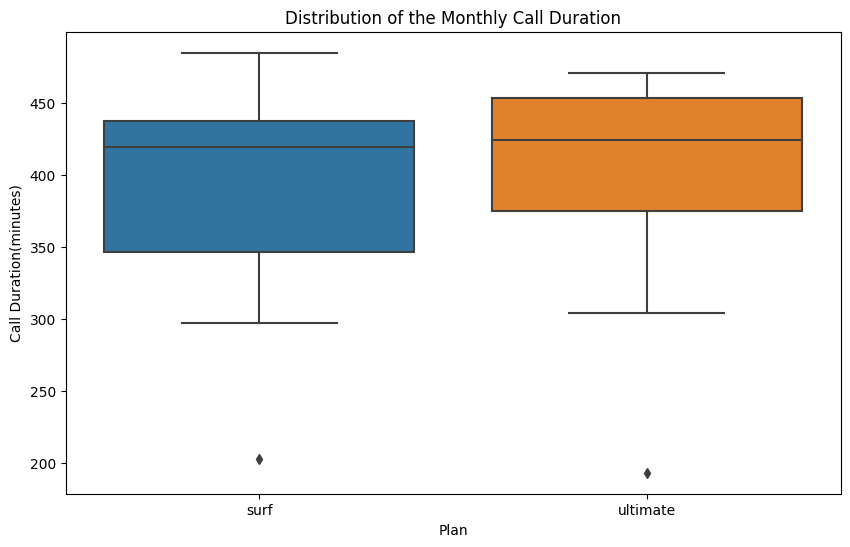

In [51]:
# Plot a boxplot to visualize the distribution of the monthly call duration

plt.figure(figsize=(10,6))
sns.boxplot(data=mean_duration,x='plan', y='total_duration_minute')
plt.title('Distribution of the Monthly Call Duration') 
plt.xlabel('Plan')
plt.ylabel('Call Duration(minutes)')
plt.show()

Conclusion: The mean and varaiance for both plans are very similar. When examining the bar graph it becomes apparent the average duration of calls over a twelve month period are fairly similar. Moreover, the histogram shows the distribution of data is fairly similar. However, it becomes apparent from the histogram that surf users have a slightly longer call duration as opposed to those on the ultimate plan. In examining the boxplot it becomes clear that surf users have a slightly longer call duration. The variation of the call duration for those on the surf plans tends to be slightly higher than the median for those on the ultimate plan based on the boxplot. Therefore, it is safe to conclude that surf users tend to have a slightly longer call duration. 

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Great visualization

[Formulate conclusions on how the users behave in terms of calling. Is their behaviour different between the plans?]

### Messages

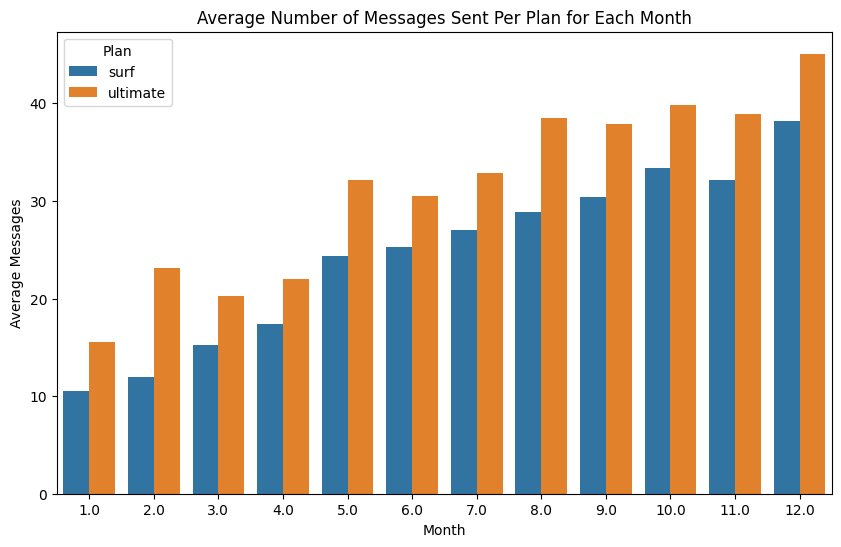

In [52]:
# Compare the number of messages users of each plan tend to send each month

mean_messages = user_monthly_data.groupby(['plan','month'])['total_message'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=mean_messages, x='month', y='total_message', hue='plan')
plt.title('Average Number of Messages Sent Per Plan for Each Month')
plt.xlabel('Month')
plt.ylabel('Average Messages')
plt.legend(title='Plan')
plt.show()

Conclusion: The number of messages sent increases for both plans over twelve months. However, those on the ultimate plan sent more messages, than those on the surf plan. 

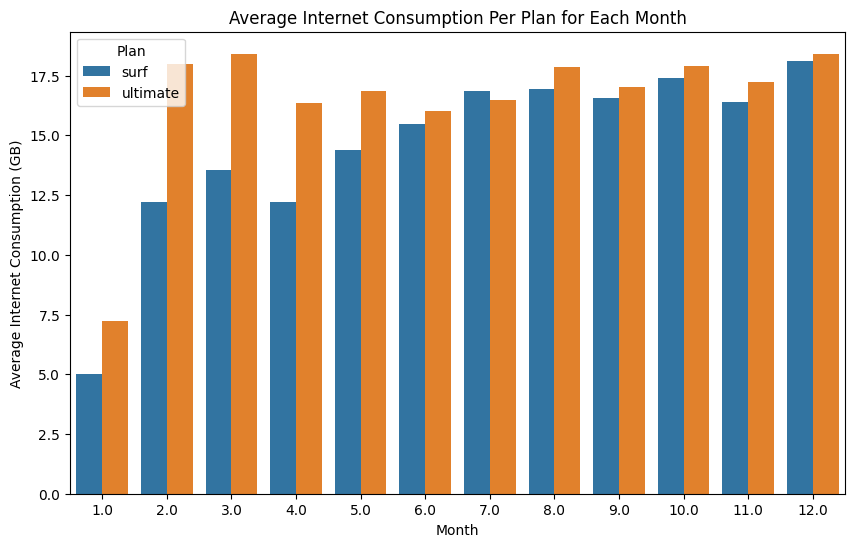

In [53]:
# Compare the amount of internet traffic consumed by users per plan
mean_internet_consumption = user_monthly_data.groupby(['plan','month'])['total_internet_volume_gb'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data= mean_internet_consumption, x='month', y='total_internet_volume_gb', hue='plan')
plt.title('Average Internet Consumption Per Plan for Each Month')
plt.xlabel('Month')
plt.ylabel('Average Internet Consumption (GB)')
plt.legend(title='Plan')
plt.show()


Conclusion: Again, both plan users expereince an increase over the twelve months. However, those using the ultimate plan appear to use more internet on average with a peak occuring during months 2 and 3. 

[Formulate conclusions on how the users behave in terms of messaging. Is their behaviour different between the plans?]

### Internet

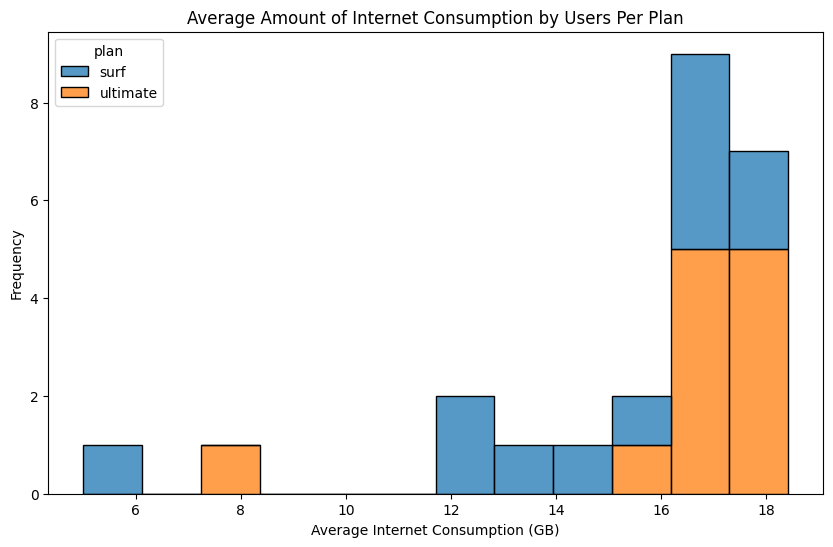

In [54]:
# Compare the amount of internet traffic consumed by users per plan. Plot a histogram.

plt.figure(figsize =(10,6))

#plot histogram 
sns.histplot(mean_internet_consumption, x='total_internet_volume_gb', hue='plan', multiple = 'stack', bins=12, legend = True)

plt.title('Average Amount of Internet Consumption by Users Per Plan')
plt.xlabel('Average Internet Consumption (GB)')
plt.ylabel('Frequency')
plt.show()

In [55]:
# Calculate the mean and the variance of the amount of internet traffic consumed by users per plan
monthly_internet_consumption_stats = user_monthly_data.groupby('plan')['total_internet_volume_gb'].agg(['mean','var']).reset_index()


#Check on monthly_internet_consumption_stats 
monthly_internet_consumption_stats

,plan,mean,var
0,surf,16.490687,60.800202
1,ultimate,17.247911,59.193685


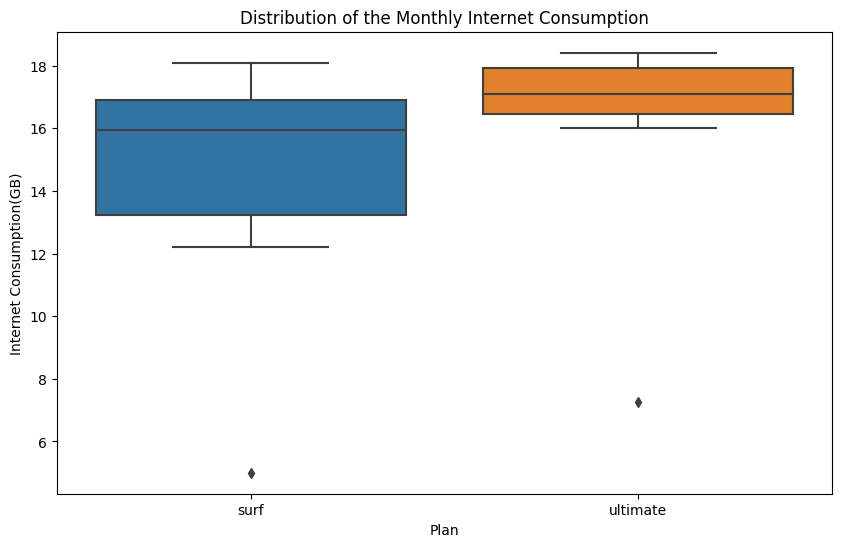

In [56]:
# Plot a boxplot to visualize the distribution 
plt.figure(figsize=(10,6))
sns.boxplot(data=mean_internet_consumption, x='plan', y='total_internet_volume_gb')
plt.title('Distribution of the Monthly Internet Consumption') 
plt.xlabel('Plan')
plt.ylabel('Internet Consumption(GB)')
plt.show()

Conclusion: In examining the internet consumption data it becomes clear that their is only a slightly higher usage from those on the ultimate plan as opposed to the surf plan. The histogram shows that the distribution of the data is fairly similar and this conclusion is further reiterated by the calculation of variance. When examining the boxplot an interesting trend emerges as it illustrates the median usage by the ultimate plan users is slightly higher with less of a spread than, the surf plan users. 

[Formulate conclusions on how the users tend to consume the internet traffic? Is their behaviour different between the plans?]

## Revenue

[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]

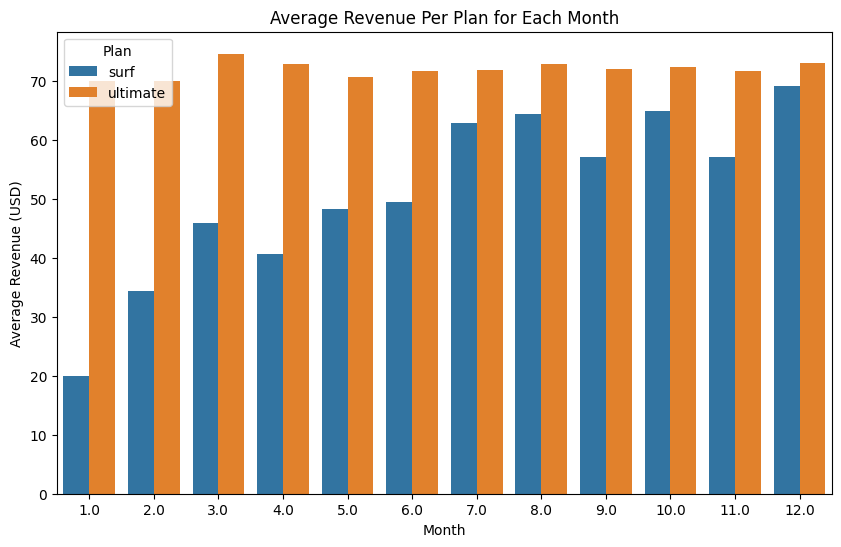

In [57]:
# Compare average revenue per each plan per each distinct month. Plot a bar plot to visualize it.
mean_revenue = user_monthly_data.groupby(['plan','month'])['monthly_revenue_calculation'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data= mean_revenue, x='month', y='monthly_revenue_calculation', hue='plan')
plt.title('Average Revenue Per Plan for Each Month')
plt.xlabel('Month')
plt.ylabel('Average Revenue (USD)')
plt.legend(title='Plan')
plt.show()


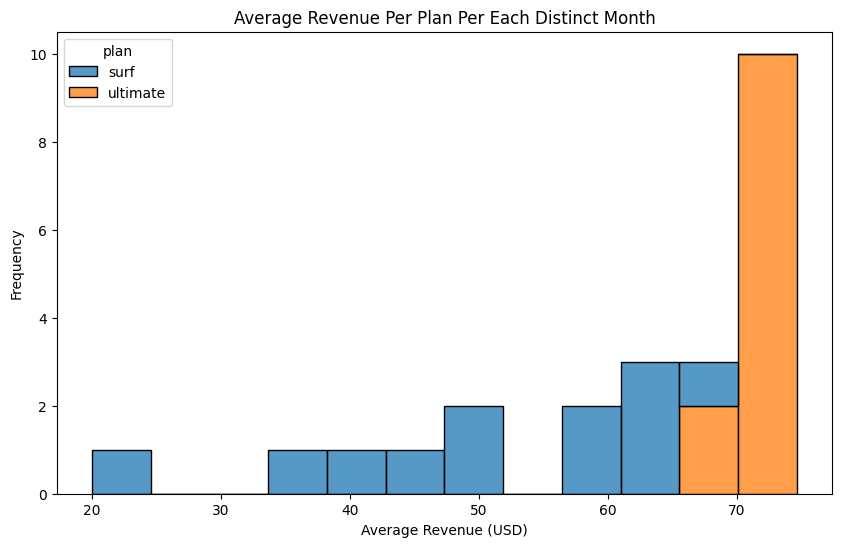

In [58]:
# Compare the average revenue per each plan per each distinct month. Plot a histogram.

plt.figure(figsize =(10,6))

#plot histogram 
sns.histplot(mean_revenue, x='monthly_revenue_calculation', hue='plan', multiple = 'stack', bins=12, legend = True)

plt.title('Average Revenue Per Plan Per Each Distinct Month')
plt.xlabel('Average Revenue (USD)')
plt.ylabel('Frequency')
plt.show()

In [59]:
# Calculate the mean and the variance of the amount of internet traffic consumed by users per plan
revenue_stats = user_monthly_data.groupby('plan')['monthly_revenue_calculation'].agg(['mean','var']).reset_index()


#Check on monthly_internet_consumption_stats 
revenue_stats

,plan,mean,var
0,surf,59.816262,2856.038088
1,ultimate,72.261838,128.003869


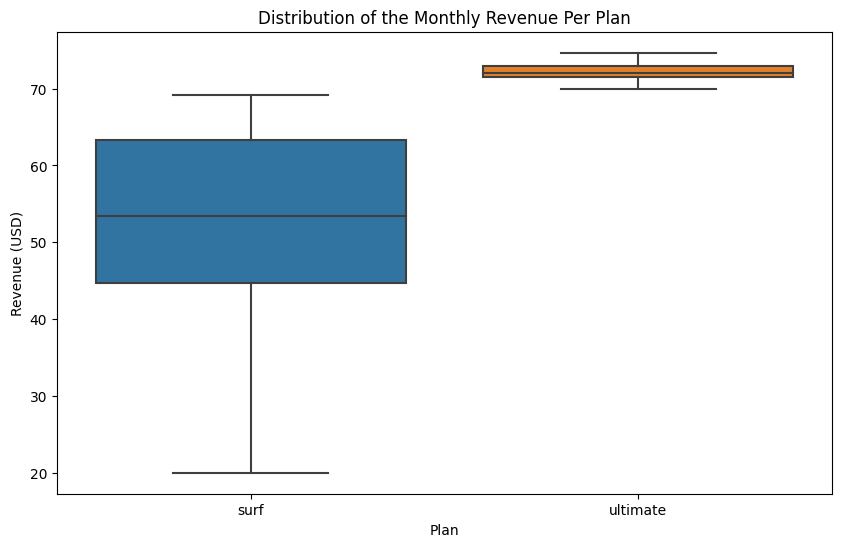

In [60]:
# Plot a boxplot to visualize the distribution 
plt.figure(figsize=(10,6))
sns.boxplot(data=mean_revenue, x='plan', y='monthly_revenue_calculation')
plt.title('Distribution of the Monthly Revenue Per Plan') 
plt.xlabel('Plan')
plt.ylabel('Revenue (USD)')
plt.show()

Conclusion: In examining the data trends shown in the histogram, calculation of the mean, calculation of the variance and the boxplot it is apparent that ultimate plan users generated more revenue than the surf plan users. Although, the distribution and spread of the data for the surf plan users shows their is more of a variation in usage than, the ultimate plan users. 

[Formulate conclusions about how the revenue differs between the plans.]

## Test statistical hypotheses

[Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

Explanation for testing: The two samples being examined are indpendent, therefore a two-sample indpendent t-test will be conducted. The goal is to determine if the average revenue from users of the Ultimate and Surf calling plans differ signficantly. The following are the null hypothesis and alternative hypothesis statements: 

H0:There is no signficant difference between average revenue from users of the Ultimate and Surf calling plans.  
H1:There is a signficant difference between average revenue from users of the Ultimate and Surf calling plans. 

In order to test this hypothesis it is decided that a signficance level of 0.05 would be appropriate and assigned to the alpha value. This is an acceptable value to use as it avoids false postives and ensures the detection of real effects. If the p-value is greater than the alpha value of 0.05 it means that the null hypothesis can be rejected as a signficant difference exist between the average revenue generated from users of the Ultiamte and Surf calling plans.  

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

The wording of Ho and H1 is missing. Please add them to the section

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__

Correct interpretation of the null and alternative hypotheses

Added wording for H0 and H1 for both test of hypothesis. 

In [61]:

# Test the hypotheses

from scipy.stats import ttest_ind 

#Split into two groups based on plan 

data_surf = user_monthly_data[user_monthly_data['plan']=='surf']
data_ultimate = user_monthly_data[user_monthly_data['plan']== 'ultimate']

#Conduct T-test to see if means differ 
t_stat,p_value = ttest_ind(data_surf['monthly_revenue_calculation'], data_ultimate['monthly_revenue_calculation'], equal_var=False)

#Display results 
print("t-stastic:",t_stat)
print("p-value:", p_value)

#Meaning of results: 
alpha = 0.05 
if p_value < alpha: 
    print("Reject H0: There is a signficant difference in average revenue between plans.")
else: 
    print("Fail to reject H0: No signficant difference in average revenue between plans.")


t-stastic: -8.772761624898482
p-value: 3.900449257166936e-18
Reject H0: There is a signficant difference in average revenue between plans.


<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №2__

All necessary libraries should be unloaded at the beginning of the project in one code cell

[Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.]

Explanation for testing: The two samples being examined are indpendent, therefore a two-sample indpendent t-test will be conducted. The goal is to determine if the average revenue from users in the NY-NJ area is different from that of users from other regions.The following are the null hypothesis and alternative hypothesis statements: 

H0: There is no signficant difference between the average revenue from users in the NY-NJ area is different from that of users from other regions. 
H1:There is a signficant difference between the average revenue from users in the NY-NJ area is different from that of users from other regions. 

In order to test this hypothesis it is decided that a signficance level of 0.05 would be appropriate and assigned to the alpha value. This is an acceptable value to use as it avoids false postives and ensures the detection of real effects. If the p-value is greater than the alpha value of 0.05 it means that the null hypothesis can be rejected as a signficant difference exist between the average revenue generated from users in the NY-NJ areas.  

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

In [62]:
# Test the hypotheses
from scipy.stats import ttest_ind 

#Seperate into two groups based on region 
data_ny_nj = user_monthly_data[user_monthly_data['city'].str.contains('NY-NJ')]
data_other_regions = user_monthly_data[~user_monthly_data['city'].str.contains('NY-NJ')]

#Conduct t-test to see if mean differ 
t_stat, p_value = ttest_ind(data_ny_nj['monthly_revenue_calculation'],data_other_regions ['monthly_revenue_calculation'],equal_var=False)

#Display results 
print("t-stastic:",t_stat)
print("p-value:", p_value)

#Interpretation 
alpha = 0.05 
if p_value < alpha: 
    print ("Reject H0: There is a signficant difference in average revenue between NY-NJ and other regions.")
else:
    print("Fail to reject H0: No signficant difference in average revenue between NY-NJ and other regions.")

t-stastic: -2.436255519987266
p-value: 0.015157409965101799
Reject H0: There is a signficant difference in average revenue between NY-NJ and other regions.


## General conclusion

[List your important conclusions in this final section, make sure they cover all those important decisions (assumptions) that you've made and that led you to the way you processed and analyzed the data.]

Conclusion: Five datasets were analyzed from the Megaline company including plan, user, call, message and internet. The data provided was useful, but required some cleaning and enrichment such as converting to datetime where appropriate, converting megabytes to gigabytes, updating column names, extracting year and month values and adding a region column in to specify users in the NY-NJ area. Data needed to be aggregated for later analysis. 

In examining user behaviors the following was concluded: 
1. Surf plan users tend to have a slightly higher call duration than the Ultimate plan users. 
2. Ulimate plan users tend to consume more interent than the Surf plan users. 
3. Ulimate plan users tend to send more messages than Surf plan users. 
4. Ultimate plan users tend to generate more revenue than Surf plan users. This may be explained by the slightly greater consumption of internet and sending more messages than those on the Surf plan. 


A two-sample indpendent t-test was conducted to examine the following hypothesis: 
1. The average revenue from users of the Ultimate and Surf calling plans differs.
2. The average revenue from users in the NY-NJ area is different from that of the users from the other regions.

A two sample indpendent t-test was conducted as the two samples being examined are independent of one another. In evaluating the hypothesis that average revenue from users of the Ultimate and Surf calling plans differs it was discovered that the p-value was signficantly higher than the alpha value. This indicates that the the null hypothesis can be rejected. This would align with earlier results gathered when analyzing user behavior as it becomes clear during this protion of the analysis that Ultimate plan users tend to generate more revenue than Surf plan users. 

While, examining the hypothesis that the avearge revenue from users in the NY-NJ area is different from that of the users from other regions a similar two sample independent t test was applied. Again teh p value proved to be higher than the alpha value. This means that the null hypothesis can be rejected. Moreover, it illustrates a signficant difference exist in the average revenue from users in the NY-NJ area compared to other regions. 


<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

You've done a great job. There are a few things that need to be fixed

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №2__


Otherwise it's great😊. Your project is begging for github =)   
    
Congratulations on the successful completion of the project 😊👍
And I wish you success in new works 😊